# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [184]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [185]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [186]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


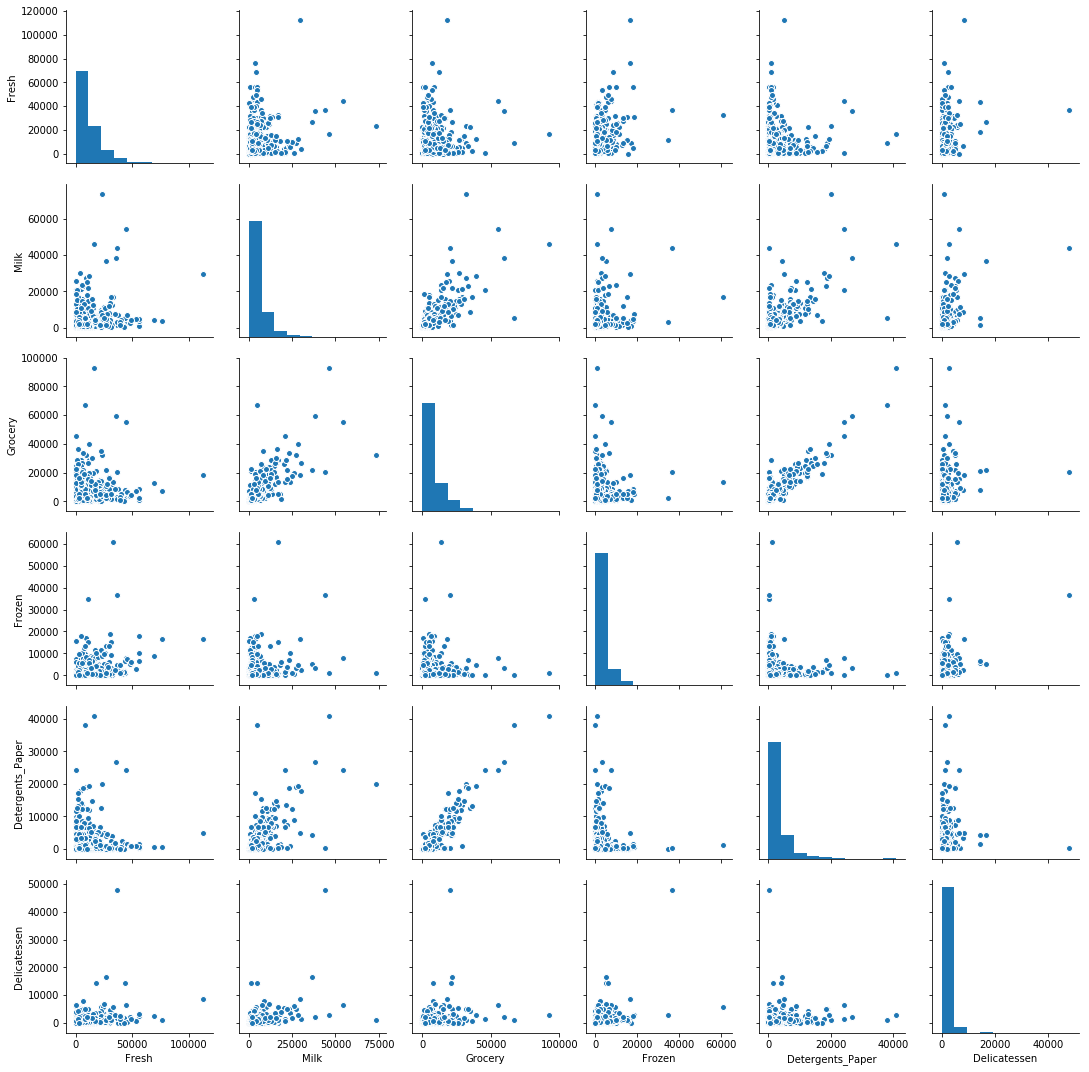

In [187]:
g = sns.pairplot(data)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [364]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [75, 181, 222, 306]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,20398,1137,3,4407,3,975
1,112151,29627,18148,16745,4948,8550
2,5041,1115,2856,7496,256,375
3,6468,12867,21570,1840,7558,1543


In [365]:
data_mean = data.mean()
data_mean

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [366]:
top_customers = pd.DataFrame()
for column in data.columns:
    new_data = data.sort_values(column, ascending=True).head(1)
    top_customers = pd.concat([top_customers, new_data])
for column in top_customers.columns:
    new_col = column + '_distance'
    top_customers[new_col] = top_customers[column].apply(lambda x : (x - data_mean[column]) / data_mean[column] * 100)
top_customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Fresh_distance,Milk_distance,Grocery_distance,Frozen_distance,Detergents_Paper_distance,Delicatessen_distance
95,3,2920,6252,440,223,709,-99.975001,-49.622739,-21.371123,-85.676765,-92.260957,-53.504247
154,622,55,137,75,7,8,-94.816795,-99.051113,-98.277006,-97.558540,-99.757070,-99.475365
75,20398,1137,3,4407,3,975,69.979116,-80.383923,-99.962270,43.460215,-99.895887,-36.060142
420,4456,5266,13227,25,6818,1393,-62.867588,-9.148405,66.350632,-99.186180,136.613435,-8.647978
161,12434,540,283,1092,3,2233,3.614096,-90.683657,-96.440823,-64.452336,-99.895887,46.438669
109,1406,16729,28986,673,836,3,-88.283624,188.616849,264.545205,-78.091962,-70.987264,-99.803262


In [367]:
top_customers = pd.DataFrame()
for column in data.columns:
    new_data = data.sort_values(column, ascending=False).head(1)
    top_customers = pd.concat([top_customers, new_data])
for column in top_customers.columns:
    new_col = column + '_distance'
    top_customers[new_col] = top_customers[column].apply(lambda x : (x - data_mean[column]) / data_mean[column] * 100)
top_customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Fresh_distance,Milk_distance,Grocery_distance,Frozen_distance,Detergents_Paper_distance,Delicatessen_distance
181,112151,29627,18148,16745,4948,8550,834.568479,411.139421,128.240060,445.096734,71.716526,460.703368
86,22925,73498,32114,987,20070,903,91.036927,1168.023261,303.884796,-67.870381,596.513881,-40.781855
85,16117,46197,92780,1026,40827,2944,34.305001,697.013124,1066.856554,-66.600821,1316.869568,93.065581
325,32717,16784,13626,60869,1272,5609,172.634902,189.565735,71.368694,1881.456738,-55.856220,267.834525
85,16117,46197,92780,1026,40827,2944,34.305001,697.013124,1066.856554,-66.600821,1316.869568,93.065581
183,36847,43950,20170,36534,239,47943,207.050715,658.246787,153.669936,1089.284208,-91.705689,3044.070361


In [368]:
for column in samples.columns:
    new_col = column + '_distance'
    samples[new_col] = samples[column].apply(lambda x : (x - data_mean[column]) / data_mean[column] * 100)

In [369]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Fresh_distance,Milk_distance,Grocery_distance,Frozen_distance,Detergents_Paper_distance,Delicatessen_distance
0,20398,1137,3,4407,3,975,69.979116,-80.383923,-99.962270,43.460215,-99.895887,-36.060142
1,112151,29627,18148,16745,4948,8550,834.568479,411.139421,128.240060,445.096734,71.716526,460.703368
2,5041,1115,2856,7496,256,375,-57.992709,-80.763477,-64.081243,144.015833,-91.115717,-75.407747
3,6468,12867,21570,1840,7558,1543,-46.101337,121.987745,171.277170,-40.102837,162.294565,1.188924


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

- Sample Customer 1:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 69.98% and 43.46% above the average on Fresh food and frozen food respectively. However, this customer also spends 80.38%, 99.96%, 99.89% and 36.06% below the average on Milk, Groceries, Detergent/Paper and Delicatessen respectively
    - From this data, it seems like this customer is a local vegetable and frozen meat market since it concentrates mainly on fresh food and frozen food, or a restaurant that serves dishes based on fresh/frozen food.
- Sample Customer 2:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 834.56%, 411.13%, 128.24%, 445.09%, 71.71% and 460.70% above the average on Fresh Food, Milk, Groceries, Frozen food, Detergent/Paper and Delicatessen respectively.
    - From this data, it can be seen that this customer keeps an above-average stock of every product, indicating that he could be a wholesale retailer.
    
(*Added the following customers during a second pass through this project, based on reviewer comments*)
- Sample Customer 3:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 144.01% above the average on Frozen Food. However, this customer also spends 57.99%, 80.76%, 64.08%, 91.11% and 75.40% below the average on Fresh food, Milk, Groceries, Detergent/Paper and Delicatessen respectively.
    - From this data, it can be seen that this customer stocks the highest amount of frozen food, indicating that it could be a frozen food retailer or a small cafe that relies on a menu based on frozen foods.
- Sample Customer 4:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 121.99%, 171.27%, 162.29% and 1.19% above the average on Milk, Groceries, Detergents/Paper and Delicatessen respectively. However, this customer also spends 46.10% and 40.10% below the average on Fresh food and Frozen Food.
    - From this data, it can be seen that this customer stocks a lot of products for daily use, indicating that it could be a local petty retailer.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [370]:
features = data.columns
scores = {}

for feature in features:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    from sklearn.metrics import r2_score
    preds = regressor.predict(X_test)
    score = r2_score(y_test, preds)
    scores[feature] = score
    
scores

{'Delicatessen': -12.27199605175562,
 'Detergents_Paper': 0.3252514609717192,
 'Fresh': -0.529020814165426,
 'Frozen': -0.2953160600160043,
 'Grocery': 0.7141253933495615,
 'Milk': 0.10883305804956556}

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- I calculated the R2 Score for all features and obtained the following results:

| Feature | R^2 Score |
|--|--|
| Fresh | -0.25 |
| Milk | 0.15 |
| Grocery | 0.687 |
| Frozen | -0.23 |
| Detergents_Paper | 0.367 |
| Delicatessen | -11.82 |

- From this table, it can be seen that the Grocery feature has the highest score of 0.687 indicating that this feature will not be necessary for identifying customers' spending habits since it can be inferred from other features
- On the other hand, the Fresh, Frozen and Delicatessen features have negative scores of -0.25, -0.23 and -11.82 respectively, indicating that the models failed to fit the data, making it harder to predict using the other features, thereby making it an important feature to consider when considering relevance
- Milk and Detergent_Paper have low scores of 0.15 and 0.367 respectively, indicating a very small correlation, making it somewhat hard to predict using the other features, thereby making it an important feature to consider when considering relevance

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

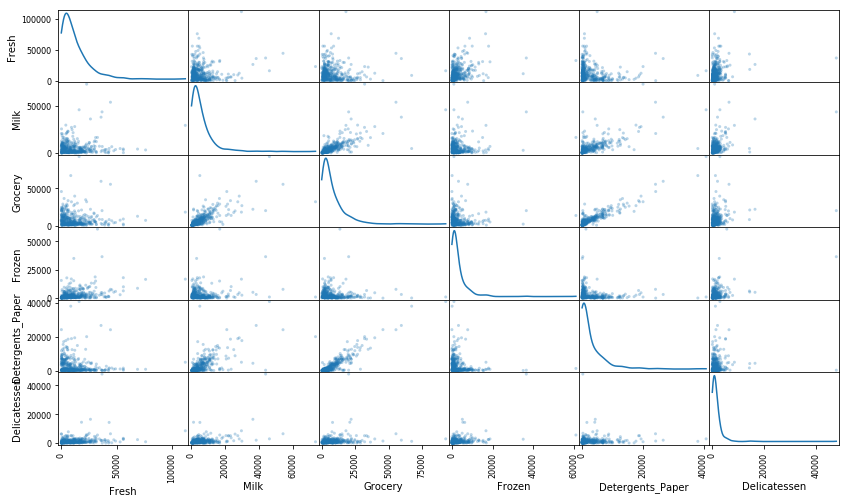

In [371]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [372]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


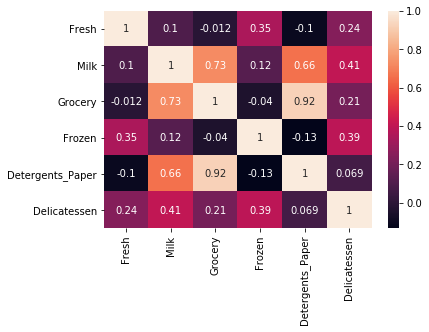

In [373]:
sns.heatmap(data.corr(), annot=True)

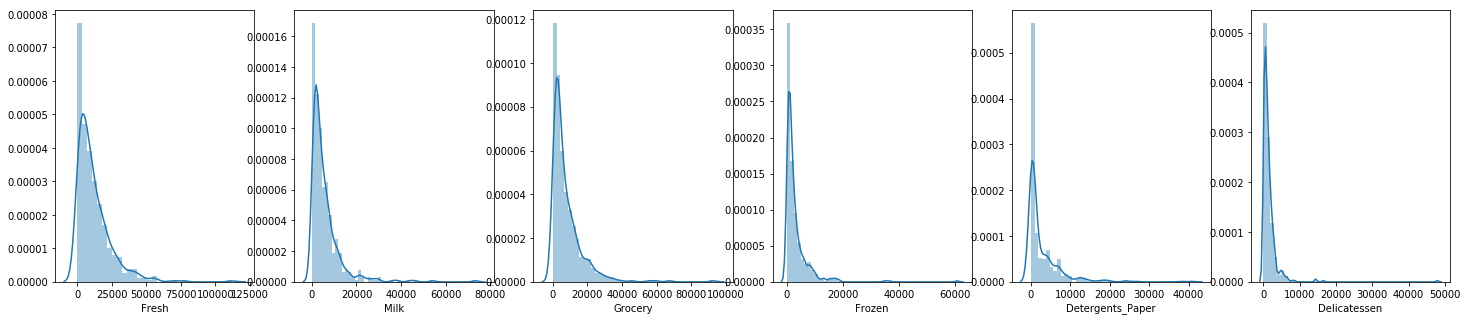

In [374]:
fig, ax = plt.subplots(1, 6, figsize=(25, 5))
for i, column in enumerate(data.columns):
    sns.distplot(data[column], ax=ax[i])

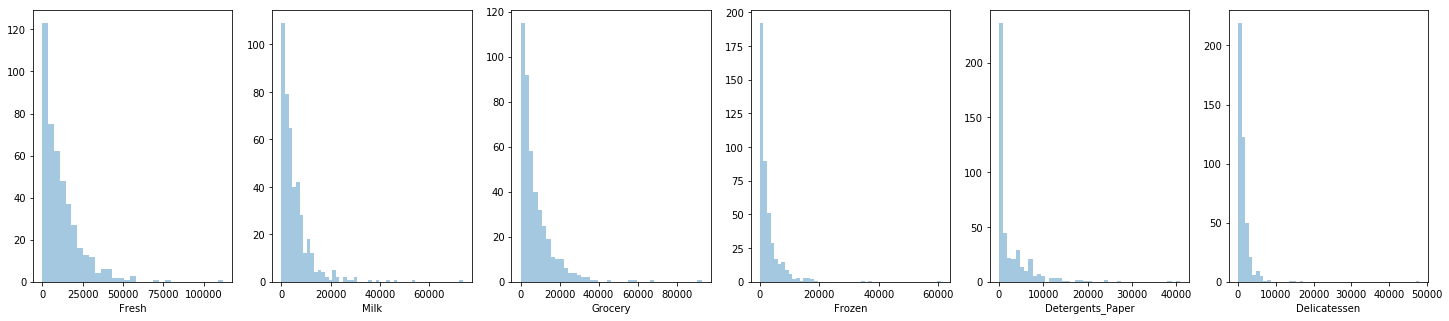

In [375]:
fig, ax = plt.subplots(1, 6, figsize=(25, 5))
for i, column in enumerate(data.columns):
    sns.distplot(data[column], ax=ax[i], kde=False)

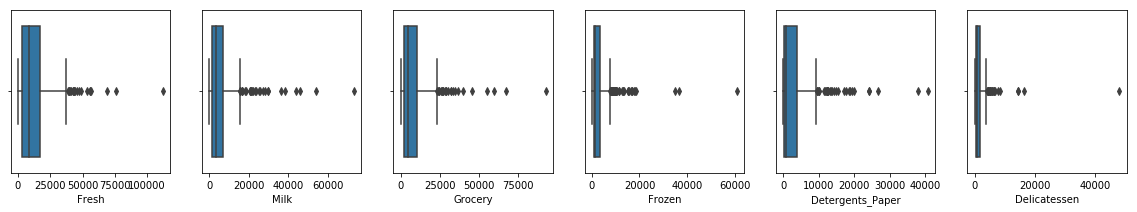

In [376]:
fig, ax = plt.subplots(1, 6, figsize=(20, 3))
for i, column in enumerate(data.columns):
    sns.boxplot(x=column, data=data, ax=ax[i])

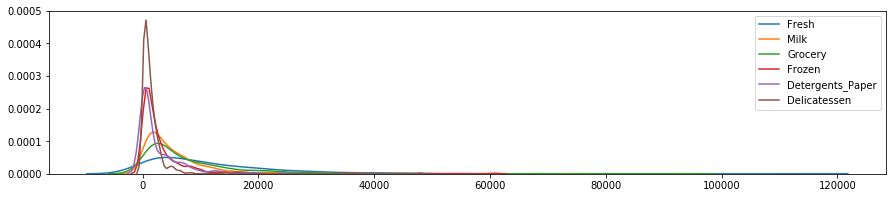

In [377]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_ylim(0, 0.0005)
for i, column in enumerate(data.columns):
    sns.kdeplot(data[column], ax=ax)

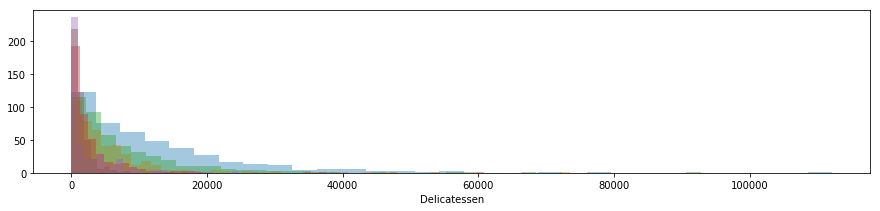

In [378]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
for i, column in enumerate(data.columns):
    sns.distplot(data[column], ax=ax, kde=False)

In [379]:
for column in data.columns:
    print("Feature = ", column, "\tMedian = ", data[column].median(), "\tMean = ", data[column].mean())

Feature =  Fresh 	Median =  8504.0 	Mean =  12000.297727272728
Feature =  Milk 	Median =  3627.0 	Mean =  5796.265909090909
Feature =  Grocery 	Median =  4755.5 	Mean =  7951.277272727273
Feature =  Frozen 	Median =  1526.0 	Mean =  3071.931818181818
Feature =  Detergents_Paper 	Median =  816.5 	Mean =  2881.4931818181817
Feature =  Delicatessen 	Median =  965.5 	Mean =  1524.8704545454545


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

- Distribution
    - From the kde plots in the scatter matrix, it looks like data for most of the features is concentrated between 0 and 20000. 
    - Visually, from the distribution plots, they all look like right-skewed (since the mean is greater than the median) truncated normal distributions
    - Based on the kdeplot of all these features, it looks like most of the values are usually between 0 and 20000, indicating that values beyond 20000 might be outliers and not too common
    - The boxplots for each feature distribution gives a better idea of the outliers
    - The number of values near zero for each of the features seems to vary between 100 and 200
- Correlation
    - Based on the correlation heatmap, it can be seen that:
        - The Grocery and Detergent_Paper features are highly correlated, with a correlation coefficient of 0.92
        - The Grocery and Milk features are highly correlated, with a correlation coefficient of 0.73. 
        - The Milk and Detergent_Paper features are highly correlated, with a correlation coefficent of 0.66
        - The Milk and Delicatessen features are slightly correlated, with a correlation coefficient of 0.41
        - The Frozen and Delicatessen features are slightly correlated, with a correlation coefficient of 0.39
        - The Frozen and Fresh features are slightly correlated, with a correlation coefficient of 0.35
    - These coefficients seem to match with our earlier predictions using the R2 score.
        - The Grocery feature has the highest correlation coefficents, and is highly correlated with Detergent_Paper and Milk. This means we were justified in not selecting Grocery as an important feature. From the scatter matrix, it can be seen that a linear model can be fit to the Grocery feature with Detergent_Paper, and Grocery with Milk. 
        - The correlation coefficients of Milk and Detergent_Paper are the next highest, and we had already selected these 2 features based on their low R2 score.From the scatter matrix, it can be seen that a linear model can be somewhat fitted to the Milk feature with Detergent_Paper.
        - The features with lower correlation coefficients are Frozen, Fresh and Delicatessen, and we had earlier found that the R2 scores for these features were negative. Hence, these features were important as well. From the scatter matrix, it can be seen that a linear model cannot be fit to linear combinations of these features. One exception is the plot of Frozen to Fresh features

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\I302861\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


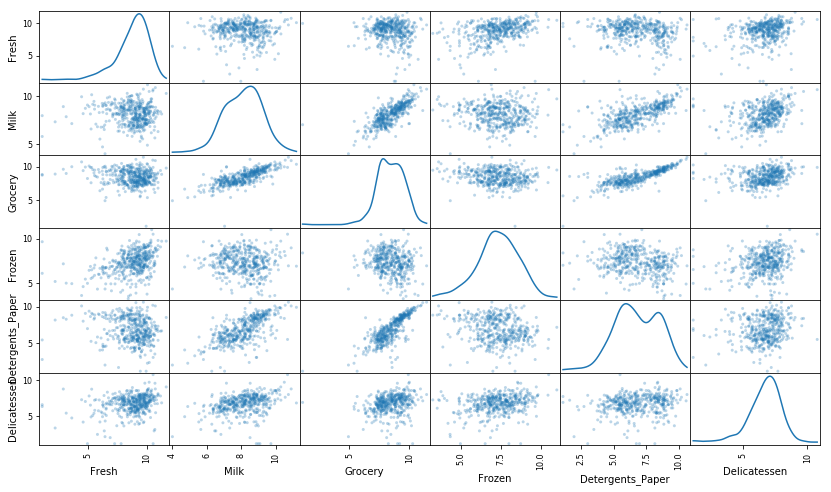

In [380]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [381]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Fresh_distance,Milk_distance,Grocery_distance,Frozen_distance,Detergents_Paper_distance,Delicatessen_distance
0,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,4.248197,NaN,NaN,3.771846,NaN,NaN
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687,6.726915,6.018932,4.853904,6.098292,4.272721,6.132754
2,8.525360,7.016610,7.957177,8.922125,5.545177,5.926926,NaN,NaN,NaN,4.969923,NaN,NaN
3,8.774622,9.462421,9.979059,7.517521,8.930362,7.341484,NaN,4.803921,5.143283,NaN,5.089413,0.173048


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [382]:
outliers = pd.DataFrame()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #display(feature_outliers)
    print(feature_outliers.shape)
    feature_outliers['feature'] = feature
    feature_outliers['outlier_position'] = feature_outliers[feature].apply(lambda x : "Left" if x < Q1 - step else "Right")
    
    outliers = pd.concat([outliers, feature_outliers])
    
# OPTIONAL: Select the indices for data points you wish to remove
print("Outliers = ")
display(outliers.head())

Data points considered outliers for the feature 'Fresh':
(16, 6)
Data points considered outliers for the feature 'Milk':
(4, 6)
Data points considered outliers for the feature 'Grocery':
(2, 6)
Data points considered outliers for the feature 'Frozen':
(10, 6)
Data points considered outliers for the feature 'Detergents_Paper':
(2, 6)
Data points considered outliers for the feature 'Delicatessen':
(14, 6)
Outliers = 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,feature,outlier_position
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,Fresh,Left
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,Fresh,Left
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856,Fresh,Left
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856,Fresh,Left
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897,Fresh,Left


In [383]:
log_data.shape, outliers.shape

((440, 6), (48, 8))

In [384]:
outlier_counts = outliers.index.value_counts()
outlier_counts[outlier_counts > 1].index

Int64Index([154, 66, 75, 128, 65], dtype='int64')

In [385]:
outliers.reset_index()[outliers.reset_index()['index'].isin(outlier_counts[outlier_counts > 1].index)].sort_values('index')

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,feature,outlier_position
0,65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,Fresh,Left
24,65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,Frozen,Left
1,66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,Fresh,Left
34,66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,Delicatessen,Left
20,75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,Grocery,Left
32,75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,Detergents_Paper,Left
5,128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,Fresh,Left
36,128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,Delicatessen,Left
18,154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,Milk,Left
21,154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,Grocery,Left


In [386]:
final_outliers = outliers.reset_index()[
    outliers.reset_index()['index'].isin(outlier_counts[outlier_counts == 1].index)
]['index'].values
final_outliers, final_outliers.shape

(array([ 81,  95,  96, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412,
         86,  98, 356,  38,  57, 145, 175, 264, 325, 420, 429, 439, 161,
        109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343], dtype=int64),
 (37,))

In [387]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[final_outliers]).reset_index(drop = True)
good_data.shape

(403, 6)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

- The following data points are considered outliers for more than one feature:
    - 65 : Outlier in Fresh and Frozen features
    - 66 : Outlier in Fresh and Delicatessen features
    - 75 : Outlier in Grocery and Detergents_Paper
    - 128 : Outlier in Fresh and Delicatessen features
    - 154 : Outlier in Milk, Grocery and Delicatessen features
- All the above features lie to the left of the interquartile range at a distance of more than 1 outlier step
- Analysis of data points that are considered as outliers for more than one feature:
    - 65 : Since the Fresh and Frozen features have a correlation of 0.35, there is a possibility that a data point with a low value for the Fresh feature will also have a low value for the Frozen feature, or vice-versa. Hence, this point cannot be an outlier since its values for both features are low, and if we mark it as an outlier, we might miss out some vital trend.
    - 66 : Since the Fresh and Delicatessen features have a correlation of 0.24, there is a possibility that a data point with a low value for the Fresh feature will also have a low value for the Delicatessen feature, or vice-versa. Hence, this point cannot be an outlier since its values for both features are low, and if we mark it as an outlier, we might miss out some vital trend.
    - 75 : Since the Grocery and Detergents_Paper features have a correlation of 0.92, there is a possibility that a data point with a low value for the Grocery feature will also have a low value for the Detergents_Paper feature, or vice-versa. Hence, this point cannot be an outlier since its values for both features are low, and if we mark it as an outlier, we might miss out some vital trend.
    - 128 : Cannot be an outlier for the same reason as data point 66
    - 154 : Since the Milk and Grocery features have a correlation of 0.73, there is a possibility that a data point with a low value for the Milk feature will also have a low value for the Grocery feature, or vice-versa. Similarly, the Delicatessen feature is positively correlated with Milk and Grocery with coefficients of 0.21 and 0.41 respectively. Hence, this point cannot be an outlier since its values for all these features are low, and if we mark it as an outlier, we might miss out some vital trend.
- Based on the above analysis, the data points that are considered outliers for more than one feature will not be removed from the original dataset, since they are more or less following the trend/correlation in the data.
- The remaining data points which are outliers in only one feature have been removed from the original dataset, since they are not following any trend/correlation in the data.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

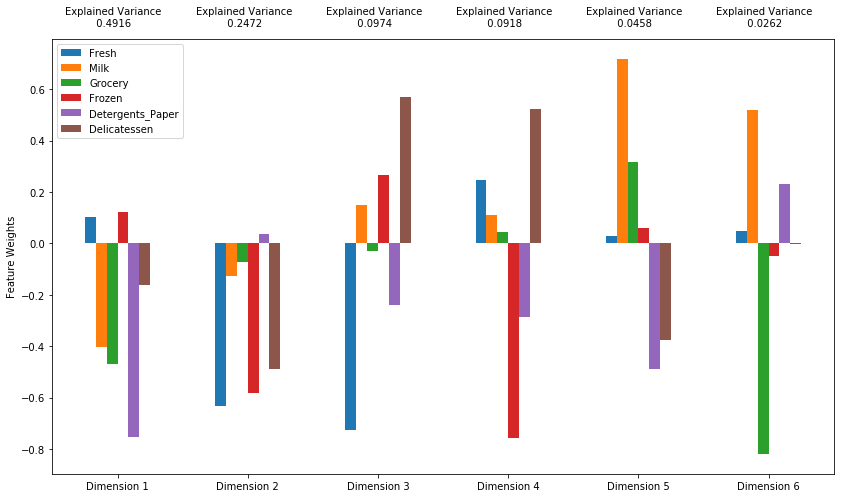

In [388]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples[good_data.columns])

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [389]:
pca.explained_variance_, pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([4.42271486, 2.22392993, 0.87629031, 0.82557987, 0.41240543,
        0.23545185]),
 array([0.49161092, 0.24720297, 0.09740485, 0.09176809, 0.0458413 ,
        0.02617187]),
 1.0)

In [390]:
total_explained_variance = pca.explained_variance_ratio_[:2].sum() * 100
total_explained_variance

73.88138907644124

In [391]:
total_explained_variance = pca.explained_variance_ratio_[:4].sum() * 100
total_explained_variance

92.7986830055467

<BarContainer object of 6 artists>

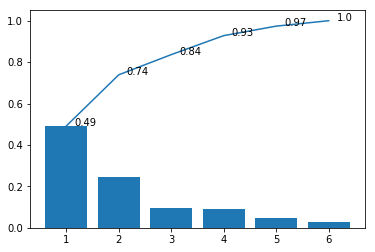

In [392]:
pca_x, pca_y = list(range(1, len(pca.components_) + 1)), pca.explained_variance_ratio_.cumsum()
plt.plot(pca_x, pca_y)
for x, y in zip(pca_x, pca_y):
    plt.annotate(round(y, 2), (x + 0.15, y))
plt.bar(range(1, len(pca.components_) + 1), pca.explained_variance_ratio_)

In [393]:
pd.Series(pca.score_samples(good_data)).describe()

count    403.000000
mean      -8.321340
std        3.303651
min      -50.086393
25%       -8.770618
50%       -7.486644
75%       -6.754170
max       -5.736181
dtype: float64

In [421]:
pd.DataFrame(pca.components_, columns=good_data.columns).iloc[0].sort_values()

Detergents_Paper   -0.751899
Grocery            -0.469579
Milk               -0.402805
Delicatessen       -0.161994
Fresh               0.104098
Frozen              0.121705
Name: 0, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- The first and second principal components explain 73.88% of the total variance in the data
- The first 4 principal components explain 92.8% of the total variance in the data
- Each Principal Component has one dimension and the mid-point has a value of 0. The sign (positive or negative) indicates the direction that a given variable in that principal component is going on a single dimension vector.
- **Principal Component 1**:
    - The Detergents_Paper feature plays the biggest role in explaining the variance of data in this component.
    - The Fresh feature plays the smallest role in explaining the variance of data in this component.
    - The scores derived from this component (linear function of this PC and the observed values for those variables) will show that:
        - Customers with negative scores will tend to spend relatively more on Detergents/Paper, Grocery, Milk and Delicatessen
        - Customers with positive scores will tend to spend relatively more on Frozen food and Fresh food
- **Principal Component 2**:
    - The Fresh feature plays the biggest role in explaining the variance of data in this component.
    - The Detergents_Paper feature plays the smallest role in explaining the variance of data in this component.
    - The scores derived from this component (linear function of this PC and the observed values for those variables) will show that:
        - Customers with negative scores will tend to spend relatively more on Fresh Food, Frozen Food, Delicatessen, Milk and Grocery
        - Customers with positive scores will tend to spend relatively more on Detergents/Paper
- **Principal Component 3**:
    - The Fresh feature plays the biggest role in explaining the variance of data in this component.
    - The Grocery feature plays the smallest role in explaining the variance of data in this component.
    - The scores derived from this component (linear function of this PC and the observed values for those variables) will show that:
        - Customers with negative scores will tend to spend relatively more on Fresh food, Detergents/Paper and Groceries
        - Customers with postivie scores will tend to spend relatively more on Delicatessen, Frozen Food and Milk
- **Principal Component 4**:
    - The Frozen feature plays the biggest role in explaining the variance of data in this component.
    - The Grocery feature plays the smallest role in explaining the variance of data in this component.
    - The scores derived from this component (linear function of this PC and the observed values for those variables) will show that:
        - Customers with negative scores will tend to spend relatively more on Frozen food and Detergents/Paper
        - Customers with positive scores will tend to spend relatively more on Delicatessen, Fresh Food, Milk, and Groceries
- Source: https://www.researchgate.net/post/what_negative_sign_mean_in_PCA

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [395]:
log_samples[good_data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,8.525360,7.016610,7.957177,8.922125,5.545177,5.926926
3,8.774622,9.462421,9.979059,7.517521,8.930362,7.341484


In [396]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,8.3377,-0.8355,1.0135,0.7514,-0.2722,4.1015
1,-2.6465,-4.5142,-0.1985,-0.0856,0.5236,0.3940
2,1.8555,-0.1124,0.3372,-1.4643,0.0670,-0.5822
3,-2.9986,-0.4787,0.0759,-0.2177,0.2048,-0.1048


**My Initial Interpretation**
- Sample Customer 1:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 69.98% and 43.46% above the average on Fresh food and frozen food respectively. However, this customer also spends 80.38%, 99.96%, 99.89% and 36.06% below the average on Milk, Groceries, Detergent/Paper and Delicatessen respectively
    - From this data, it seems like this customer is a local vegetable and frozen meat market since it concentrates mainly on fresh food and frozen food, or a restaurant that serves dishes based on fresh/frozen food.
- Sample Customer 2:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 834.56%, 411.13%, 128.24%, 445.09%, 71.71% and 460.70% above the average on Fresh Food, Milk, Groceries, Frozen food, Detergent/Paper and Delicatessen respectively.
    - From this data, it can be seen that this customer keeps an above-average stock of every product, indicating that he could be a wholesale retailer.
    
(*Added the following customers during a second pass through this project, based on reviewer comments*)
- Sample Customer 3:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 144.01% above the average on Frozen Food. However, this customer also spends 57.99%, 80.76%, 64.08%, 91.11% and 75.40% below the average on Fresh food, Milk, Groceries, Detergent/Paper and Delicatessen respectively.
    - From this data, it can be seen that this customer stocks the highest amount of frozen food, indicating that it could be a frozen food retailer or a small cafe that relies on a menu based on frozen foods.
- Sample Customer 4:
    - Comparing the data for this sample with the mean in each category, we can see that this customer spends 121.99%, 171.27%, 162.29% and 1.19% above the average on Milk, Groceries, Detergents/Paper and Delicatessen respectively. However, this customer also spends 46.10% and 40.10% below the average on Fresh food and Frozen Food.
    - From this data, it can be seen that this customer stocks a lot of products for daily use, indicating that it could be a local petty retailer.

**PCA Interpretation**
- Sample Customer 1
    - Dimension 1 - Spends more on Fresh Food and Frozen Food
    - Dimension 2 - Spends more on Fresh Food, Frozen Food, Delicatessen, Milk and Grocery
    - Dimension 3 - Spends more on Delicatessen, Frozen Food and Milk
    - Dimension 4 - Spends more on Delicatessen, Fresh Food, Milk, and Groceries
    - Conclusion - Fresh Food and Frozen food appear to be the most important items that this customer spends on. This matches my initial interpretation.
- Sample Customer 2
    - Dimension 1 - Spends more on Detergents/Paper, Grocery, Milk and Delicatessen
    - Dimension 2 - Spends more on Fresh Food, Frozen Food, Delicatessen, Milk and Grocery
    - Dimension 3 - Spends more on Fresh food, Detergents/Paper and Groceries
    - Dimension 4 - Spends more on Frozen food and Detergents/Paper
    - Conclusion - Grocery, Milk and Delicatessen appear to be the most important items that this customer spends on. This doesn't match my initial interpretation completely.   
- Sample Customer 3
    - Dimension 1 - Spends more on Frozen food and Fresh food
    - Dimension 2 - Spends more on Fresh Food, Frozen Food, Delicatessen, Milk and Grocery
    - Dimension 3 - Spends more on Delicatessen, Frozen Food and Milk
    - Dimension 4 - Spends more on Frozen food and Detergents/Paper
    - Conclusion - Frozen food seems to be common to all dimensions, indicating that this is the most important item that this customer spends on. This matches with my initial interpretation.
- Sample Customer 4
    - Dimension 1 - Spends more on Detergents/Paper, Grocery, Milk and Delicatessen
    - Dimension 2 - Spends more on Fresh Food, Frozen Food, Delicatessen, Milk and Grocery
    - Dimension 3 - Spends more on Delicatessen, Frozen Food and Milk
    - Dimension 4 - Spends more on Frozen food and Detergents/Paper
    - Conclusion - Grocery, Milk and Delicatessen appear repeatedly in most of the dimensions, indicating that these might be the most important items that the customer spends on. This is nearly equivalent to my initial interpretation, although I had mentioned Detergents/Paper as well.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [397]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples[good_data.columns])

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [398]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.778255,0.488321
1,-1.901944,-0.515765
2,-2.018543,-1.325998
3,0.958508,-1.409805
4,-1.019900,-2.167465


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [399]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,8.3377,-0.8355
1,-2.6465,-4.5142
2,1.8555,-0.1124
3,-2.9986,-0.4787


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

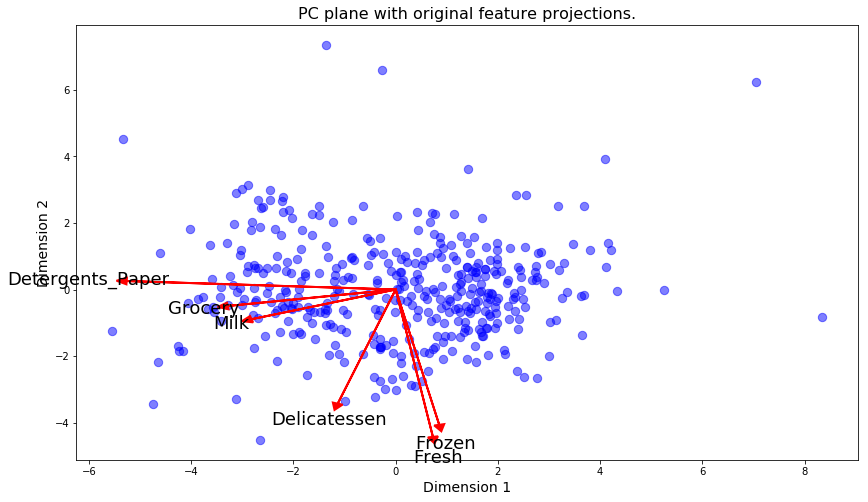

In [400]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [401]:
#vs.biplot(log_samples, pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']), pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

- From the biplot, it can be seen that the Detergents_Paper feature is most strongly correlated with the first component
- From the biplot, it can be seen that the Fresh feature is most strongly correlated with the second component.
- These observations agree with the pca_results plot obtained earlier
- The Frozen and Fresh features seem to be positively correlated since the angle between their vectors is small
- The Grocery, Milk and Detergents_Paper features seem to be positively correlated since the angles between their vectors are small.
- The Detergents_Paper feature is most likely not correlated with the Frozen or Fresh features since their vectors are nearly perpendicular to each other
- Source: https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

- K-Means
    - Advantages
        - Low running time
        - Better for high dimensional data
        - Easy to interpret and implement
    - Disadvantages
        - Doesn't work when clusters are not spherical because of its use of a distance metric that depends on the cluster center.
        - Data points are deterministically assigned to one and only one cluster (Hard Assignment), and cannot be used for overlapping clusters
- GMM
    - Advantages
        - Works even when clusters are non-linear and not of any particular geometric shape
        - Data points are assigned to more than one cluster, with probability values indicating the probability of a data point belonging to a given gaussian distribution out of all the gaussian distributions that have been fitted to the data (Soft Assignment). Hence, this can be used for overlapping clusters
        - Fastest algorithm for learning mixture models
        - As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
    - Disadvantages
        - Uses all components it has access to, so initialization of clusters will be difficult when dimensionality of data is high. This also means it might need held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.
        - For computational reasons, it can fail to work if the dimensionality of the problem is too high 
        - Assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
        - When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
- I will use the Gaussian Mixture Model for clustering this data due to the following reasons:
    - We have already seen that the data points are normally distributed
    - There might be latent features that haven't been captured and GMM tends to work better than K-Means in this case, since K-Means doesn't account for latent features.
    - It will be better to know the probabilities with which data points belong to different clusters (soft assignment) rather than hard assignment as in the case of KMeans.
    - The dimensionality of the data isn't high, so there will not be any computational constraints.
- Sources
    - https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
    - https://medium.com/clustering-with-gaussian-mixture-model/clustering-with-gaussian-mixture-model-c695b6cd60da
    - https://scikit-learn.org/stable/modules/mixture.html#gmm

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [402]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = []
for i in range(2, 20):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=i)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores.append(score)

In [403]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores_kmeans = []
for i in range(2, 20):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores_kmeans.append(score)

In [404]:
list(zip(range(2, 20), scores))

[(2, 0.43542437328584394),
 (3, 0.2767681571852189),
 (4, 0.30313019577929484),
 (5, 0.27277661407260273),
 (6, 0.2763600849844983),
 (7, 0.30985594902597086),
 (8, 0.3361337978523673),
 (9, 0.2830291316264193),
 (10, 0.32111779082347564),
 (11, 0.313894995790716),
 (12, 0.2744889714310533),
 (13, 0.29699676862909113),
 (14, 0.29549942555521613),
 (15, 0.30377148949707683),
 (16, 0.2936184992165846),
 (17, 0.2837005296710912),
 (18, 0.2814886274906333),
 (19, 0.30059906021818283)]

Text(0.5, 1.0, 'K-Means')

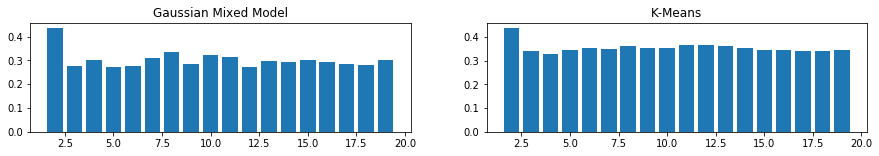

In [405]:
fig, ax = plt.subplots(1, 2, figsize=(15, 2))
ax[0].bar(range(2, 20), scores)
ax[0].set_title('Gaussian Mixed Model')
ax[1].bar(range(2, 20), scores_kmeans)
ax[1].set_title('K-Means')

In [406]:
np.array(scores).max(), np.array(scores).argmax()

(0.43542437328584394, 0)

In [407]:
np.array(scores_kmeans).max(), np.array(scores_kmeans).argmax()

(0.4377378094777937, 0)

In [408]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

- The number of clusters was varied from 2 to 19, and the corresponding bar graph of number of clusters vs. silhouette score was plotted.
- Of these, it was found that the best silhouette score of 0.43 was achieved when the cluster size was set to 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


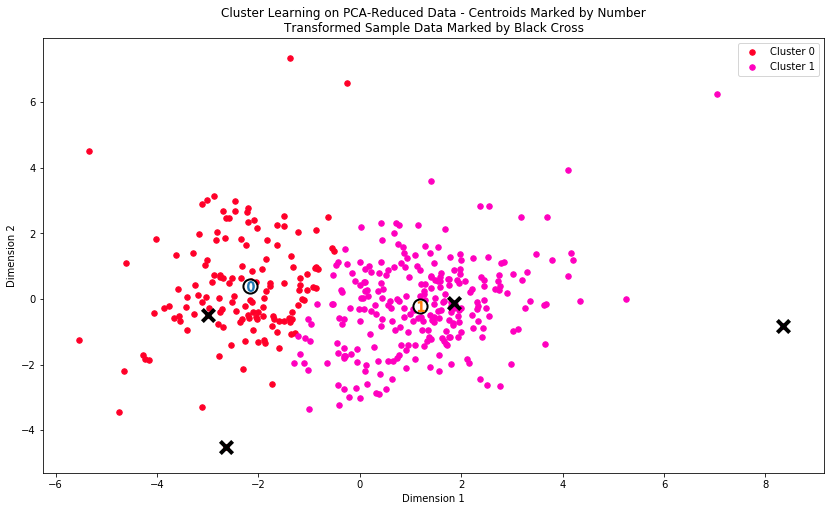

In [409]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [410]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4562.0,7631.0,11988.0,1010.0,4540.0,1026.0
Segment 1,9383.0,2125.0,2580.0,2138.0,355.0,794.0


In [411]:
data_mean = data.mean()
data_mean

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [412]:
for column in true_centers.columns:
    new_col = column + '_distance'
    true_centers[new_col] = true_centers[column].apply(lambda x : (x - data_mean[column]) / data_mean[column] * 100)

In [413]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Fresh_distance,Milk_distance,Grocery_distance,Frozen_distance,Detergents_Paper_distance,Delicatessen_distance
Segment 0,4562.0,7631.0,11988.0,1010.0,4540.0,1026.0,-61.984277,31.653725,50.768230,-67.121666,57.557201,-32.715596
Segment 1,9383.0,2125.0,2580.0,2138.0,355.0,794.0,-21.810273,-63.338466,-67.552383,-30.402101,-87.679999,-47.930003


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

- Customer Segment 0
    - Comparing the data for this segment with the mean of each category, we can see that this segment spends 31.65%, 50.77%, and 57.55% above average on Milk, Groceries and Detergents/Paper while it spends 61.98% and 32.71% below average on Fresh food and Delicatessen.
    - This might indicate that they are wholesale retailers or supermarkets.
- Customer Segment 1
    - Comparing the data for this segment with the mean of each category, we can see that this segment spends 21.81%, 63.33%, 67.55%, 30.40%, 87.68% and 47.93% below average on Fresh food, Milk, Grocery, Frozen Food, Detergents/Paper and Delicatessen respectively.
    - This might indicate they are local petty shops and not supermarkets.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [419]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0


**Answer:**

- The first sample point belongs to the second customer segment
    - Original Guess - Local vegetable and frozen meat market since it concentrates mainly on fresh food and frozen food.
    - Prediction - Local petty shop and not a supermarket
- The second sample point belongs to the first customer segment
    - Original Guess - Wholesale Retailer
    - Prediction - Wholesale Retailer or supermarket
- The third sample point belongs to the second customer segment
    - Original Guess - Frozen food retailer or a small cafe that relies on a menu based on frozen foods
    - Prediction - Local petty shop and not a supermarket
- The fourth sample point belongs to the first customer segment
    - Original Guess - Local petty retailer
    - Prediction - Wholesale Retailer or supermarket
- Conclusion: It seems like the first 3 predictions are somewhat consistent with the original guesses

*Note: Based on the evaluation later in this notebook, I found that my interpretation of the first customer segment has to be corrected. It can either represent a local petty shop or a cafe/restaurant which tends to stock up items on an as-needed basis*

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

- The wholesale distributor can pick one segment at a time, to evaluate their response to their new delivery service, while keeping the old delivery service for the remaining segment. 
- The responses from both these segments will then have to be compared to figure out which segment reacted positively to this new delivery service. Each segment will react differently
- In this case, the first segment represents small customers that might be local petty shops/ small markets / cafes / restaurants, who might not react positively to this change since they deal with the consumer directly on a daily basis and need to stock up in good supply. Since they work on a day-to-day basis, they may not have funds to buy products in bulk 3 days a week. 
- The second segment represents bigger customers that might be wholesale retailers or supermarkets, who might react positively since they have the necessary funds to stock up products in bulk 3 days a week. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- A supervised learning algorithm can be run using the original data, with the customer segment as the target variable.
- Since we are assuming that each segment has already been mapped to an appropriate delivery service, we can use our trained classifier to predict the segment to which a new customer belongs and assign to it the delivery service corresponding to that segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [415]:
reduced_data.shape, outliers.shape, pca_samples.shape

((403, 2), (48, 8), (4, 2))

In [416]:
reduced_data[(reduced_data['Dimension 1'] < -2) & (reduced_data['Dimension 2'] > -2)].index

Int64Index([  2,   9,  10,  12,  13,  14,  16,  28,  35,  37,  41,  42,  44,
             45,  47,  48,  52,  55,  61,  63,  65,  75,  79,  82,  88,  90,
             93,  94,  99, 100, 103, 144, 145, 147, 148, 149, 151, 153, 154,
            158, 160, 168, 171, 172, 179, 182, 183, 186, 190, 192, 195, 196,
            197, 201, 224, 230, 244, 246, 269, 277, 278, 279, 280, 283, 286,
            289, 293, 304, 306, 312, 313, 314, 317, 320, 322, 332, 343, 363,
            374, 382, 384, 391, 401],
           dtype='int64')

In [417]:
import matplotlib.cm as cm
abc = None
def channel_results(reduced_data, outliers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
    Data is labeled by "Channel" and cues added for student-selected sample data
    '''

    # Check that the dataset is loadable
    try:
        full_data = pd.read_csv("customers.csv")
    except:
        print("Dataset could not be loaded. Is the file missing?")       
        return False

    # Create the Channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel
    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:
        print(i)
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i-1)*1.0/2), label = labels[int(i)-1], s=30);

    # Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
               s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

    # Set plot title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

1
2


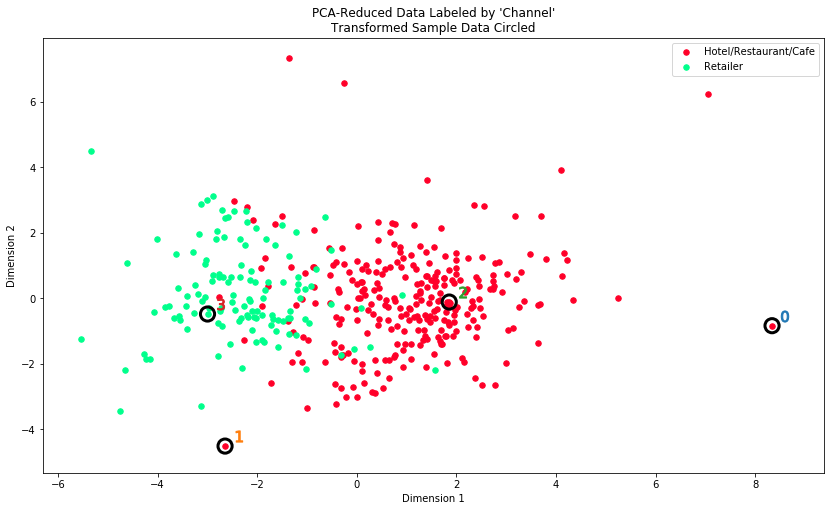

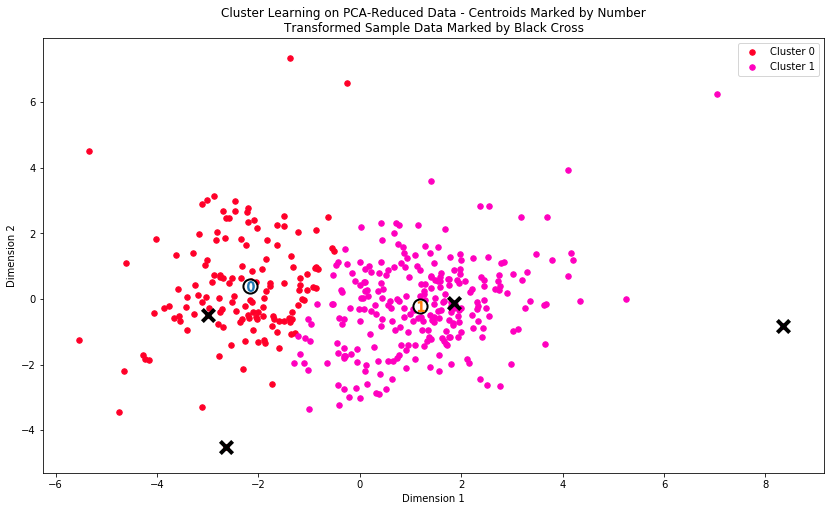

In [418]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, final_outliers, pca_samples)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [355]:
reduced_data_probabilities = pd.DataFrame(clusterer.predict_proba(reduced_data), columns=['Cluster 0', 'Cluster 1'])
reduced_data_predictions = pd.DataFrame(clusterer.predict(reduced_data))

In [356]:
reduced_data_probabilities = pd.concat([reduced_data_probabilities, reduced_data_predictions], axis=1)

In [357]:
reduced_data_probabilities.head()

,Cluster 0,Cluster 1,0
0,0.108484,0.891516,1
1,0.176901,0.823099,1
2,0.218581,0.781419,1
3,0.990808,0.009192,0
4,0.681400,0.318600,0


In [358]:
reduced_data_strong_cluster_0 = reduced_data_probabilities[reduced_data_probabilities['Cluster 0'] > 0.9]
reduced_data_strong_cluster_1 = reduced_data_probabilities[reduced_data_probabilities['Cluster 1'] > 0.9]

In [359]:
reduced_data_strong_cluster_0.shape, reduced_data_strong_cluster_1.shape

((207, 3), (86, 3))

In [360]:
reduced_data_strong = pd.concat([reduced_data.iloc[reduced_data_strong_cluster_0.index], reduced_data.iloc[reduced_data_strong_cluster_1.index]])

In [361]:
reduced_data_strong_preds = np.concatenate((np.repeat(0, reduced_data_strong_cluster_0.shape[0]), np.repeat(1, reduced_data_strong_cluster_1.shape[0])))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


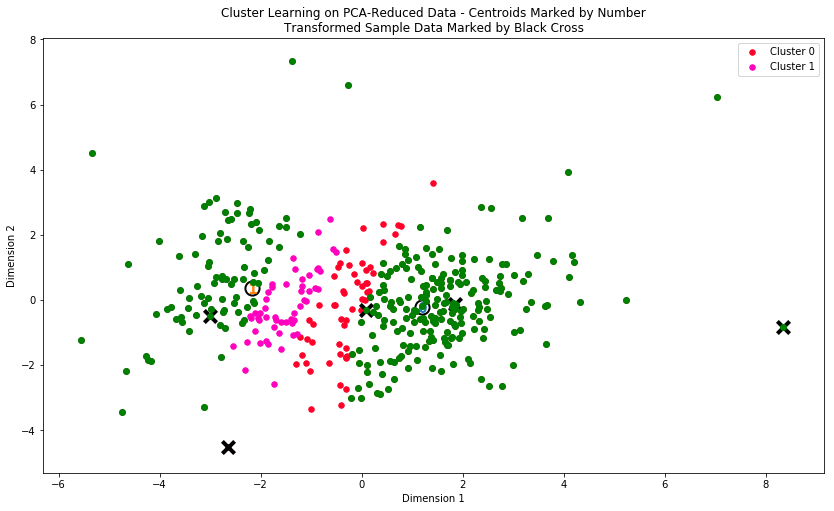

In [362]:
#vs.cluster_results(reduced_data_strong, reduced_data_strong_preds, centers, pca_samples)
vs.cluster_results(reduced_data, preds, centers, pca_samples)
plt.scatter(reduced_data_strong['Dimension 1'], reduced_data_strong['Dimension 2'], color='green')

In [420]:
pca_samples, clusterer.predict_proba(pca_samples)

(array([[ 8.33767939, -0.8354972 ],
        [-2.64654427, -4.51424983],
        [ 1.85546237, -0.11237073],
        [-2.99862443, -0.47871645]]), array([[2.62580009e-12, 1.00000000e+00],
        [8.65044747e-01, 1.34955253e-01],
        [1.45017276e-03, 9.98549827e-01],
        [9.69957411e-01, 3.00425888e-02]]))

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The number of clusters chosen for the clustering algorithm, i.e., 2, matches with the number of channels in the original data.
- The distribution of data in the clusters chosen by the clustering algorithm is more or less aligned with the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. In the underlying distribution, data points corresponding to retailers do tend to appear more to the left and data points corresponding to Hotel/Restaurant/Cafe customers do tend to appear more to the right, which matches with the 2 clusters that were chosen, wherein one cluster is towards the left and the other is towards the right. Hence, we can map Customer Segment 1 (Cluster 0) to Retailers and Customer Segment 2 (Cluster 1) to Hotel/Restaurant/Cafe customers.
- There is a slightly tilted demarcation between Retailers and Hotel/Restaurant/Cafe customers, although there are quite a few overlapping points from different categories where the clusters meet in the middle. This justifies our usage of a Gaussian Mixture Model rather than a KMeans model, to evaluate the degree of certainty with which a given data point belongs to a cluster.
- If we check the probabilities with which each data point belongs to a given cluster, it can be seen that the probabilities are greater than 0.9 towards the left and right of the plot, and there is more uncertainty towards the center of the plots, implying that data points in the center cannot be purely classified.
- This implies that customers that lie outside the central region can be more purely classified while those in the center have some ambiguity.
- 3 out of 4 of the sample data points have been classified correctly, based on the graphs above. The misclassified point (Data point 1) lies near the boundary where the clusters meet each other. If we take a closer look at the predicted probabilities, we find the following:

| Sample Data Point | P(Retailer) | P(Hotel/Restaurant/Cafe) | Channel |
|-|-|-|-|
| 0 | ~0 | 1 | Hotel/Restaurant/Cafe |
| 1 | 0.865 | 0.135 | Hotel/Restaurant/Cafe |
| 2 | 0.145 | 0.998 | Hotel/Restaurant/Cafe |
| 3 | 0.969 | 0.031 | Retailer |

- The points that were classified correctly had a high probability for a given cluster. The point which was misclassified did have some ambiguity with the probability of being a Retailer equal to 0.865 and that of being a Hotel equal to 0.135. 
        
- My previous definition of customer segments assumed that the customers in the first/left cluster were local retailers and those in the second/right cluster were wholesale retailers or supermarkets. My interpretation of the first cluster was incorrect and should have been Hotel/Restaurant/Cafe. This has been corrected.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.